In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/data/compare_5/
! ls

/content/drive/.shortcut-targets-by-id/1lTbeLKl99_-ux0hJXW-AtqLq-J_M1fIm/data/compare_5
adapter.txt	      predict_embeddings.txt  random_baseline.txt
average_baseline.txt  pretrain_random.txt


In [ ]:
filenames = ["random_baseline", "average_baseline", "pretrain_average", "pretrain_random", "adapter", "predict_embeddings"]
N = len(filenames)
# pretrain_average
data = [[] for i in range(0, len(filenames))]
for i in range(0, len(filenames)):
  f = open(filenames[i] + ".txt", "r")
  for j in f.readlines():
    data[i].append(int(j))

[[1.0, 0.1972761040033017, 0.21378456458935205, 0.2054477919933966, 0.19661576557985969, 0.2050520059435364], [0.1972761040033017, 1.0, 0.19975237309120925, 0.20610813041683862, 0.20247626908790756, 0.1982829783721314], [0.21378456458935205, 0.19975237309120925, 1.0, 0.2018984729673958, 0.2008254230293025, 0.19787023278850915], [0.2054477919933966, 0.20610813041683862, 0.2018984729673958, 1.0, 0.20198101527032605, 0.1849925705794948], [0.19661576557985969, 0.20247626908790756, 0.2008254230293025, 0.20198101527032605, 1.0, 0.197292388971438], [0.2050520059435364, 0.1982829783721314, 0.19787023278850915, 0.1849925705794948, 0.197292388971438, 1.0]]


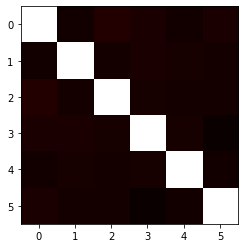

In [ ]:
total = [[0 for i in range(0, N)] for j in range(0, N)]
success = [[0 for i in range(0, N)] for j in range(0, N)]
for i in range(0, N):
  for j in range(i, N):
    for k in range(0, len(data[i])):
      if data[i][k] == -1 or data[j][k] == -1:
        continue
      total[i][j] += 1
      if data[i][k] == data[j][k]:
        success[i][j] += 1
prob = [[0 for i in range(0, N)] for j in range(0, N)]
for i in range(0, N):
  for j in range(i, N):
    prob[i][j] = success[i][j]/total[i][j]
    prob[j][i] = prob[i][j]

[[1.0, 0.1972761040033017, 0.21378456458935205, 0.2054477919933966, 0.19661576557985969, 0.2050520059435364], [0.1972761040033017, 1.0, 0.19975237309120925, 0.20610813041683862, 0.20247626908790756, 0.1982829783721314], [0.21378456458935205, 0.19975237309120925, 1.0, 0.2018984729673958, 0.2008254230293025, 0.19787023278850915], [0.2054477919933966, 0.20610813041683862, 0.2018984729673958, 1.0, 0.20198101527032605, 0.1849925705794948], [0.19661576557985969, 0.20247626908790756, 0.2008254230293025, 0.20198101527032605, 1.0, 0.197292388971438], [0.2050520059435364, 0.1982829783721314, 0.19787023278850915, 0.1849925705794948, 0.197292388971438, 1.0]]


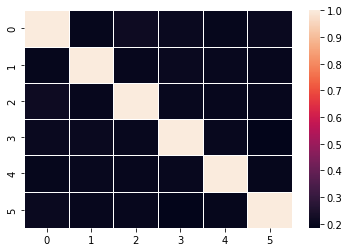

In [ ]:
print(prob)
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.heatmap(prob, linewidth=0.5)
plt.show()
